# Código para simulación de dispositivo MuTe en 3 dimensiones a partir de la iluminación de barras cetelleadores en el dispositivo.

**Resumen**: El siguiente código consiste en la simulación del dispositivo MuTe para el análisis de la determinación de la dirección de partículas entrantes en en detector en tres dimensiones que consiste de un par de paneles paralelos que contienen $N_x\times N_y$ pixeles, de tamaños $d\times d$ (en cm$^2$) y las cuales están separados una distancia $D$ (en cm). La trayectoria del muon está determinada por su dirección, en tres dimensiones dada por los ángulos azimutal y cenital del vector que representa la trayectoria, iluminando un pixel $(i,j)$ en la placa frontal y un pixel $(k,l)$ en la placa posterior.

**Insumos y productos del código**: dado un par de pixeles que se iluminan tanto en los paneles frontal como posterior se obtiene la dirección de arribo del muón y se determina el área efectiva de detección.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import random

Definamos una función de validación para el rango de pixeles en el detector

In [2]:
def ValidarPixel(XPixel, YPixel, Nx, Ny) :
    if XPixel < 0 or XPixel > Nx :
         print "Pixel X fuera de rango " 
    if YPixel < 0 or YPixel > Ny :
         print "Pixel Y fuera de rango" 
    return 

In [3]:
# Función que pinta los paneles y los pixeles
# PanelArriba y PanelAbajo son dos arreglos bidimensionales Nx x Ny
def PintoPaneles(PanelFrontal,PanelPosterior):
    plt.figure(figsize=(10.,10.))
    plt.subplot(1, 2, 1)
    plt.xlabel('i')
    plt.ylabel('j')
    plt.title('Panel Frontal')
    plt.imshow(PanelFrontal)
    plt.subplot(1, 2, 2)
    plt.xlabel('k')
    plt.ylabel('l')    
    plt.title('Panel Posterior')
    plt.imshow(PanelPosterior)
    # se dibujo los paneles
    plt.show()
    return

**Dirección de arribo de las partículas.** El arribo de un muón al detector está caracterizado por un vector de trayectoria 
\begin{equation}
\vec{r}=X_{arribo}{\bf e}_1+Y_{arribo}{\bf e}_2+Z_{arribo}{\bf e}_3,
\end{equation}
con módulo 
\begin{equation}
r=|\vec{r}|=\sqrt{X_{arribo}^2+Y_{arribo}^2+Z_{arribo}^2},
\end{equation}
de tal manera que los cosenos directores que definen la dirección de la trayectoria del muón están dados por 
\begin{equation}
\cos\alpha=\frac{X_{arribo}}{r}, \cos\beta=\frac{Y_{arribo}}{r}, \cos\gamma=\frac{Z_{arribo}}{r}.
\end{equation}

En este caso $X_{arribo}=(i-k)d$, $Y_{arribo}=(j-l)d$  y $Z_{arribo}=D$, de tal manera que la trayectoria es completamente determinada conociendo los pares de píxeles que se iluminan haciendo coincidencia en los paneles frontal y posterior respectivamente, como se muestra en la siguiente figura. En este caso los cosenos directores que determinan la dirección de la partícula están dado por 
\begin{eqnarray}
\cos\alpha&=&\frac{X_{arribo}}{r}=\frac{(i-k)d}{\sqrt{(i-k)^2d^2+(j-l)^2d^2+D^2}}, \\
\cos\beta&=&\frac{Y_{arribo}}{r}=\frac{(j-l)d}{\sqrt{(i-k)^2d^2+(j-l)^2d^2+D^2}}, \\
\cos\gamma&=&\frac{Z_{arribo}}{r}=\frac{D}{\sqrt{(i-k)^2d^2+(j-l)^2d^2+D^2}}. 
\end{eqnarray}

Los cosenos directores cumplen con la restricción natural $\cos^2\alpha+\cos^2\beta+\cos^2\gamma=1$. De lo anterior, pueden invertirse estas ecuaciones para obtener los puntos iluminados en el detector a partir de los cosenos directores, tal que, 
\begin{equation}
(i-k)d=\pm\frac{D\cos\alpha}{\sqrt{1-\cos^2\alpha+\cos^2\beta}}, \ \ \ \ (j-l)d=\pm\frac{D\cos\beta}{\sqrt{1-\cos^2\alpha+\cos^2\beta}}.
\end{equation}

Otra forma en la que se puede recostruir la trayectoria sería considerando no los cosenos directores sino los ángulo azimutal y cenital de entrada del muón, es decir, considerar coordenadas esféricas. En este caso, 
\begin{eqnarray}
\cos\varphi&=&\frac{X_{arribo}}{r'}=\frac{(i-k)d}{\sqrt{(i-k)^2d^2+(j-l)^2d^2}}, \\
\sin\varphi&=&\frac{Y_{arribo}}{r'}=\frac{(j-l)d}{\sqrt{(i-k)^2d^2+(j-l)^2d^2}}, \\
\cos\theta&=&\frac{Z_{arribo}}{r}=\frac{D}{\sqrt{(i-k)^2d^2+(j-l)^2d^2+D^2}}. 
\end{eqnarray}

Invirtiendo nuevamente las ecuaciones anteriores tendremos que
\begin{equation}
(i-k)=\pm\frac{D\cos\varphi\sin\theta}{d\cos\varphi}, \ \ \ \ (j-l)=\pm\frac{D\sin\varphi\sin\theta}{d\cos\varphi},
\end{equation}
en términos de los cosenos directores se tienen las relaciones
\begin{eqnarray}
\cos\alpha=\cos\varphi\sin\theta, \ \ \ \ \ \cos\beta=\sin\varphi\sin\theta, \\
\varphi=\arctan\left(\frac{\cos\beta}{\cos\alpha}\right), \ \ \ \ \ \theta=\sqrt{1-\cos^2\alpha-\cos^2\beta}.
\end{eqnarray}

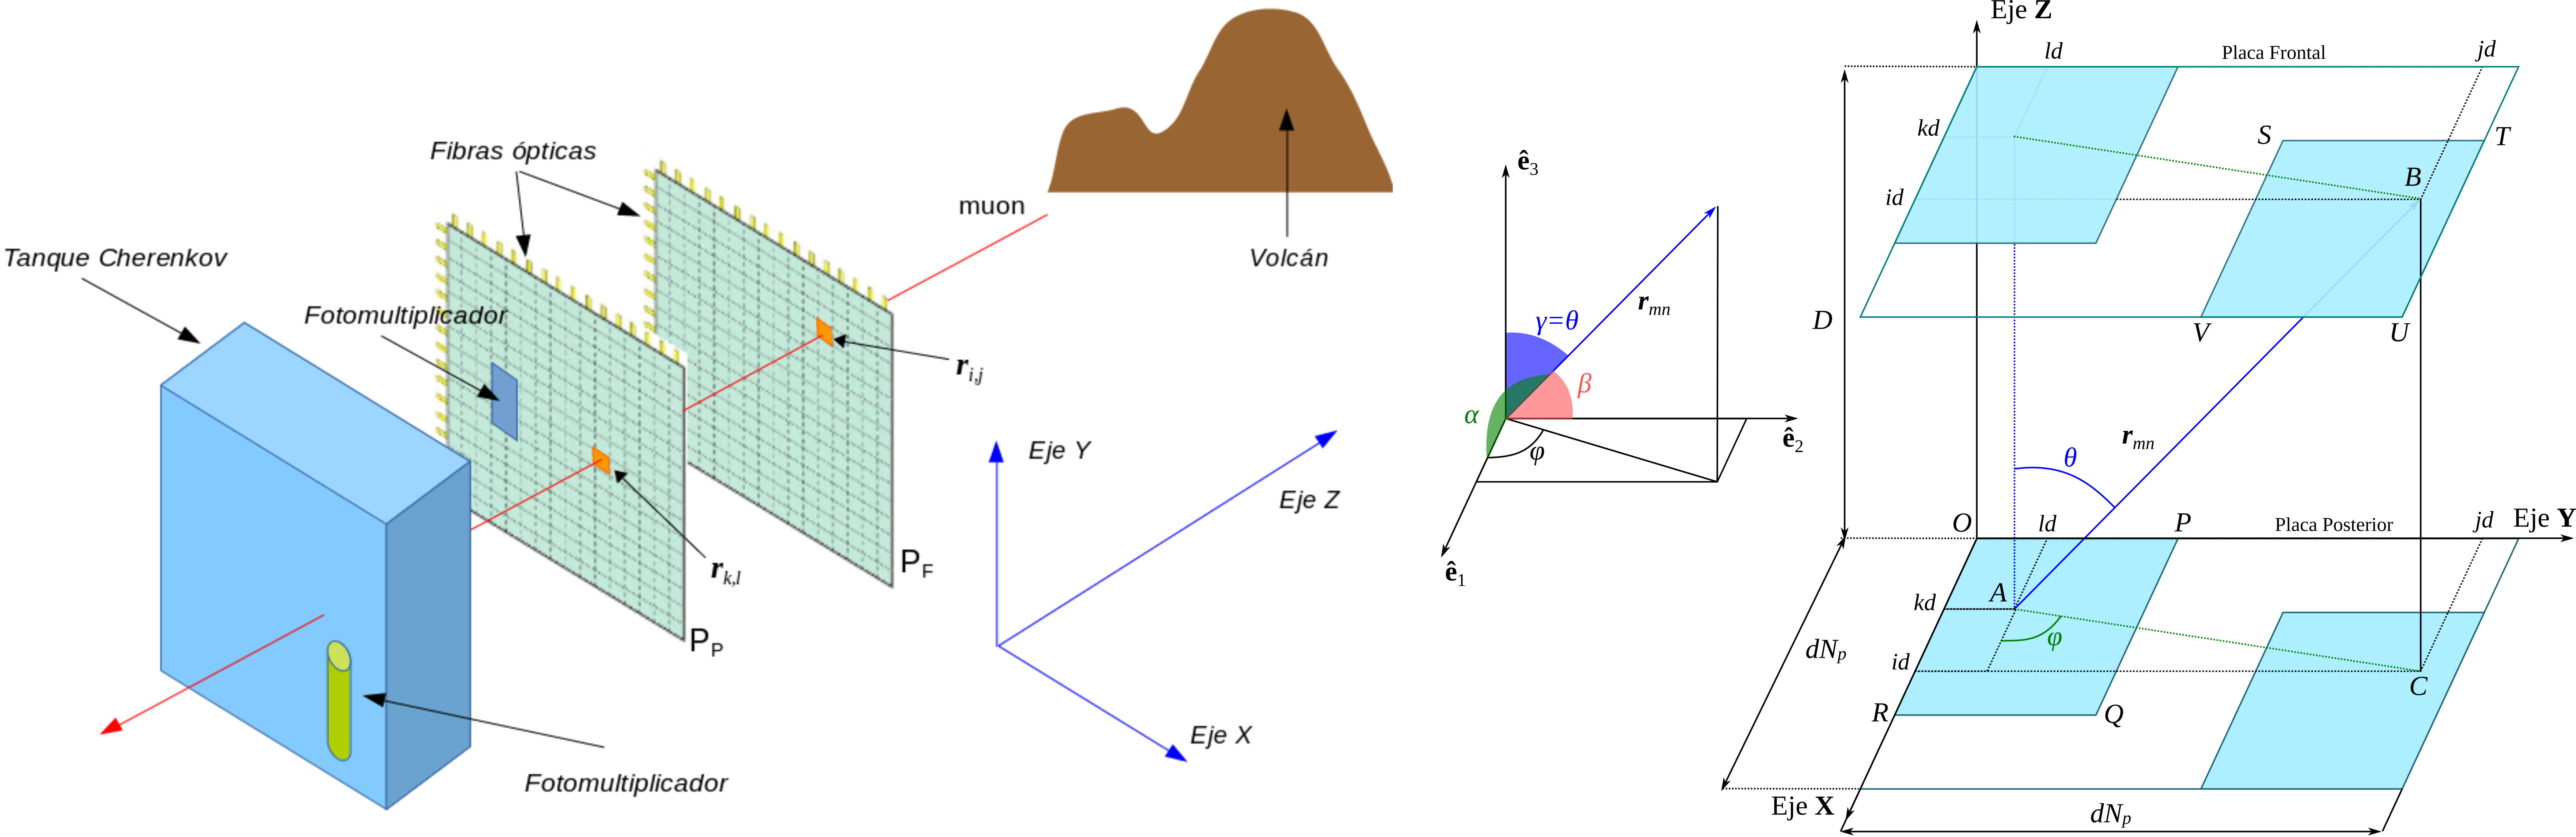

In [4]:
from IPython.display import Image
Image(filename='reconstruccion2.png', width=900)

In [5]:
def DireccionArribo(XPixelFrontal, YPixelFrontal, XPixelPosterior, YPixelPosterior, D, d):
    global XArribo, YArribo, ZArribo, alpha, beta, gamma
    import math
    XArribo = d*(XPixelFrontal-XPixelPosterior)
    YArribo = d*(YPixelFrontal-YPixelPosterior)
    ZArribo = D
    modulo = math.sqrt(XArribo**2+YArribo**2+ZArribo**2)
    cosalpha = XArribo/modulo
    cosbeta = YArribo/modulo
    cosgamma = ZArribo/modulo
    alpha=math.degrees(math.acos(cosalpha))
    beta=math.degrees(math.acos(cosbeta))
    gamma=math.degrees(math.acos(cosgamma))
    print "La partícula tiene la siguiente dirección:"
    print "X_Arribo =",XArribo, "Y_Arribo =",YArribo, "Z_Arribo =",ZArribo
    print "Los cosenos directores son:"
    print "cos(Alpha) =",cosalpha, "; cos(Beta) =",cosbeta, "; cos(Gamma) =",cosgamma
    print "Los ángulos (en grados) respecto a los ejes X, Y, y Z son:"
    print "alpha =",alpha, "; beta =",beta, "; gamma =",gamma
    return

Luego introducimos las características del Detector. En este caso el detector consiste de par de paneles con $N_x$ centelleadores de ancho $d$ en la dirección $X$, y $N_y$ centelleadores de ancho $d$ en la dirección $Y$, separados por una distancia $D$. Para este detector $N_x=N_y=30$, $d=4$, $D=200$.

In [6]:
#Nx = Numero de Barras en la dirección X
#Ny = Numero de Barras en la dirección Y
#d = Ancho de las Barras (cm): d
#D = Separacion de los Paneles (cm): D
Nx=30
Ny=30
d=4#cm
D=200#cm

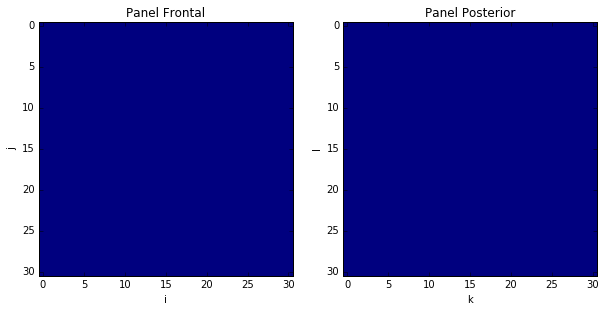

In [7]:
# Limpiando contenido de los paneles
PanelFrontal = np.zeros((Nx+1,Ny+1)) # (i,j)
PanelPosterior = np.zeros((Nx+1,Ny+1)) # (k,l)
PintoPaneles(PanelFrontal,PanelPosterior)

Iluminando una dirección particular: vamos a introducir una dirección de arribo particular aleatoria para el muón haciendo coincidencia en un pixel en el panel frontral y posterior, respectivamente.

XPixelFrontal 7
YPixelFrontal 25
XPixelPosterior 9
YPixelPosterior 17


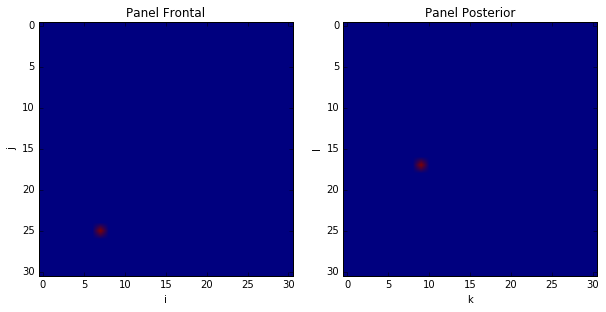

In [8]:
#XPixelFrontal = input("Pixel X panel superior ? ")
#YPixelFrontal = input("Pixel X panel inferior ? ")
#XPixelPosterior = input("Pixel X panel superior ? ")
#YPixelPosterior = input("Pixel X panel inferior ? ")
XPixelFrontal=np.random.randint(1, 31)#i
YPixelFrontal=np.random.randint(1, 31)#j
XPixelPosterior=np.random.randint(1, 31)#k
YPixelPosterior=np.random.randint(1, 31)#l
print "XPixelFrontal", XPixelFrontal
print "YPixelFrontal", YPixelFrontal
print "XPixelPosterior", XPixelPosterior
print "YPixelPosterior", YPixelPosterior
ValidarPixel(XPixelFrontal,YPixelFrontal,Nx,Ny)
ValidarPixel(XPixelPosterior,YPixelPosterior,Nx,Ny)
# Iluminando las celdas de los paneles
PanelFrontal[YPixelFrontal,XPixelFrontal]=10.
PanelPosterior[YPixelPosterior,XPixelPosterior]=10.
PintoPaneles(PanelFrontal,PanelPosterior)

In [9]:
DireccionArribo(XPixelFrontal, YPixelFrontal, XPixelPosterior, YPixelPosterior, D, d)

La partícula tiene la siguiente dirección:
X_Arribo = -8 Y_Arribo = 32 Z_Arribo = 200
Los cosenos directores son:
cos(Alpha) = -0.0394668518982 ; cos(Beta) = 0.157867407593 ; cos(Gamma) = 0.986671297455
Los ángulos (en grados) respecto a los ejes X, Y, y Z son:
alpha = 92.2618714978 ; beta = 80.9168654514 ; gamma = 9.36515852576


Ahora veamos el área efectiva de detección producto de las direcciones equivalentes

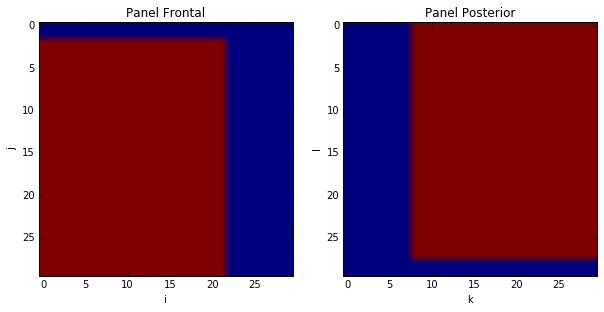

In [10]:
# Limpiando contenido de los paneles
PanelFrontal = np.zeros((Nx,Ny)) # (i,j)
PanelPosterior = np.zeros((Nx,Ny)) # (k,l)
# Iluminando los puntos que corresponden a direcciones equivalentes
DeltaXIngreso = XPixelFrontal-XPixelPosterior
DeltaYIngreso = YPixelFrontal-YPixelPosterior
#
for i in range(Nx)  :
    for j in range(Ny)  :
        if i+DeltaXIngreso < Nx  and i+DeltaXIngreso >= 0 :
            if j+DeltaYIngreso < Ny  and j+DeltaYIngreso >= 0 :
                PanelFrontal[i,j]=10.
                PanelPosterior[i+DeltaXIngreso,j+DeltaYIngreso]=10.
            else :continue
        else : continue
# Pintando los paneles            
PintoPaneles(PanelFrontal,PanelPosterior)

In [11]:
#Calculando el area efectiva
Area=d**2*(Nx-np.abs(DeltaXIngreso))*(Ny-np.abs(DeltaYIngreso))
print "El area efectiva es =" ,Area

El area efectiva es = 9856


Ahora vamos a simular el comportamiento de los paneles cuando un flujo incide, en este caso el archivo de entra consiste de un archivo de datos aleatorios con los valores de los pixeles iluminados dispuestos en cuatro columnas en el archivo, generados con un código para obtener números aleatorios.

In [12]:
dataflujo=np.loadtxt('pixels.dat')

In [13]:
YPixelFrontal=dataflujo[:,1]
XPixelFrontal=dataflujo[:,0]
YPixelPosterior=dataflujo[:,3]
XPixelPosterior=dataflujo[:,2]

In [14]:
def DireccionArriboTotal(XPixelFrontal, YPixelFrontal, XPixelPosterior, YPixelPosterior, D, d):
    global XArribo, YArribo, ZArribo, alpha, beta, gamma
    import math
    XArribo = d*(XPixelFrontal-XPixelPosterior)
    YArribo = d*(YPixelFrontal-YPixelPosterior)
    ZArribo = D
    modulo = math.sqrt(XArribo**2+YArribo**2+ZArribo**2)
    cosalpha = XArribo/modulo
    cosbeta = YArribo/modulo
    cosgamma = ZArribo/modulo
    alpha=math.degrees(math.acos(cosalpha))
    beta=math.degrees(math.acos(cosbeta))
    gamma=math.degrees(math.acos(cosgamma))
    return(XArribo,YArribo,ZArribo,alpha,beta,gamma)

In [15]:
XArriboTotal=[]
YArriboTotal=[]
ZArriboTotal=[]
alphaTotal=[]
betaTotal=[]
gammaTotal=[]

/home/david/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/david/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


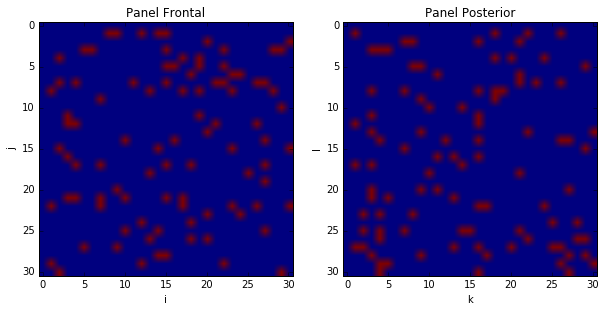

In [16]:
# Limpiando contenido de los paneles
PanelFrontal = np.zeros((Nx+1,Ny+1)) # (i,j)
PanelPosterior = np.zeros((Nx+1,Ny+1)) # (k,l)
for i in range(len(YPixelFrontal)):
    PanelFrontal[YPixelFrontal[i],XPixelFrontal[i]]=10.
    PanelPosterior[YPixelPosterior[i],XPixelPosterior[i]]=10.
    v1, v2, v3, v4, v5, v6 = DireccionArriboTotal(XPixelFrontal[i], YPixelFrontal[i], XPixelPosterior[i], YPixelPosterior[i], D, d)
    XArriboTotal.append(v1)
    YArriboTotal.append(v2)
    ZArriboTotal.append(v3)
    alphaTotal.append(v4)
    betaTotal.append(v5)
    gammaTotal.append(v6)
PintoPaneles(PanelFrontal,PanelPosterior)


Salvamos un archivo con las direcciones generadas a partir de los pixeles iluminados

In [17]:
np.savetxt('FromPixelsToDirections.dat', np.c_[XArriboTotal,YArriboTotal,ZArriboTotal,alphaTotal,betaTotal,gammaTotal], 
           fmt="%i, %i, %i, %f, %f, %f")

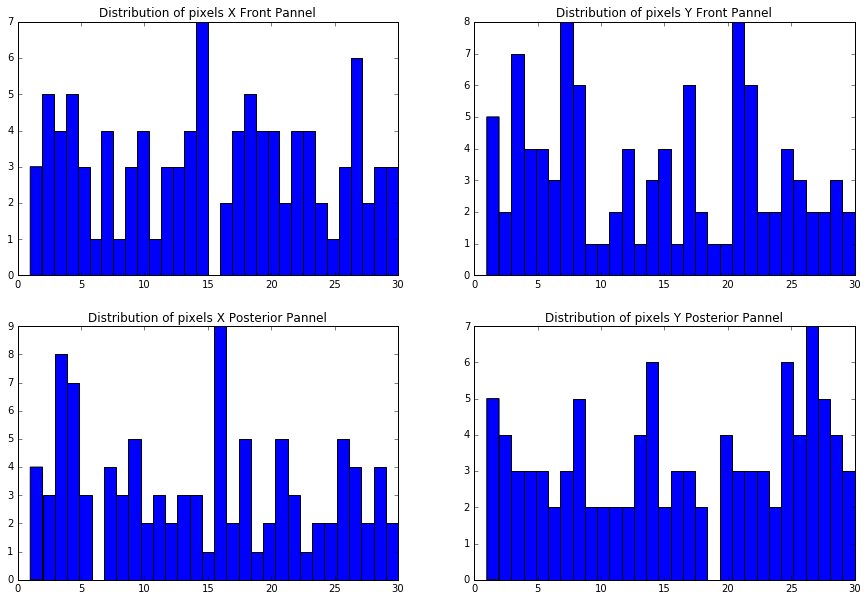

In [18]:
# Histogramas de frecuencias.
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
histi = plt.hist(XPixelFrontal, 31, normed=False)
plt.title("Distribution of pixels X Front Pannel")
plt.subplot(2,2,2)
histj = plt.hist(YPixelFrontal, 30, normed=False)
plt.title("Distribution of pixels Y Front Pannel")
plt.subplot(2,2,3)
histk = plt.hist(XPixelPosterior, 30, normed=False)
plt.title("Distribution of pixels X Posterior Pannel")
plt.subplot(2,2,4)
histl = plt.hist(YPixelPosterior, 30, normed=False)
plt.title("Distribution of pixels Y Posterior Pannel")
plt.show()